In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances

dataset = pd.read_csv("diabetes_dataset.csv")

In [2]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


## View the amount of missing data

In [3]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Percentage of missing data


In [4]:
size = dataset.shape[0]*8
missing_data = 0
col = ['Pregnancies',"Glucose",'BloodPressure','SkinThickness',
       'Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in col:
    missing_data += dataset[i].isnull().sum()
"The amount of missing data in the dataset represents {:%} of 4.576 data".format(missing_data/size)

'The amount of missing data in the dataset represents 14.248252% of 4.576 data'

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,567.000000,537.000000,345.000000,198.000000,561.000000,572.000000,572.000000,572.000000
mean,4.106643,121.647266,73.150838,29.356522,156.934343,32.327629,0.459121,34.043706,0.358392
std,3.446995,30.132084,12.347184,10.433503,119.066934,6.735437,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,22.000000,77.500000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,185.000000,36.600000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


##  Normalize our dataset

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset  = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.456522,0.304348,NaN,0.393862,0.243892,0.483333,1.0
1,0.058824,0.264516,0.391304,0.239130,NaN,0.214834,0.121279,0.166667,0.0
2,0.470588,0.896774,0.369565,NaN,NaN,0.130435,0.263883,0.183333,1.0
3,0.000000,0.600000,0.108696,0.304348,0.208791,0.636829,0.981786,0.200000,1.0
4,0.294118,0.464516,0.478261,NaN,NaN,0.189258,0.054642,0.150000,0.0


## How do i pick the best k?

In [7]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

errors_graphic = []
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        errors_graphic.append(error)
        
    return errors

In [8]:
k_errors = optimize_k(data=dataset, target='Outcome')
k_errors

[{'K': 1, 'RMSE': 0.3272055596423593},
 {'K': 3, 'RMSE': 0.34968805974816297},
 {'K': 5, 'RMSE': 0.35605568690011546},
 {'K': 7, 'RMSE': 0.36711329846934654},
 {'K': 9, 'RMSE': 0.3439881191072688},
 {'K': 11, 'RMSE': 0.332330375170356},
 {'K': 13, 'RMSE': 0.33918444385985885},
 {'K': 15, 'RMSE': 0.3295768037426442},
 {'K': 17, 'RMSE': 0.3263886720114399},
 {'K': 19, 'RMSE': 0.2908906861766939}]

Text(0, 0.5, 'Mean Error')

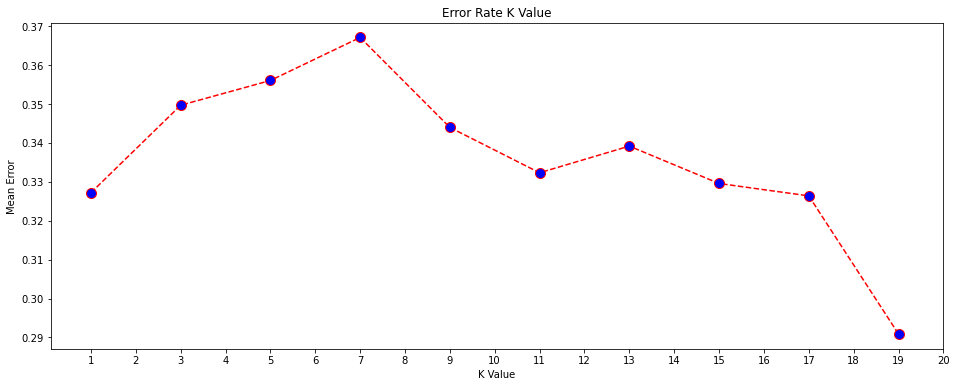

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(range(1, 20, 2), errors_graphic, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1, 21, 1.0))
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## Knn imputation

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=19)
imputed = imputer.fit_transform(dataset)
df_imputed = pd.DataFrame(imputed, columns=dataset.columns)
df_imputed


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.456522,0.304348,0.242770,0.393862,0.243892,0.483333,1.0
1,0.058824,0.264516,0.391304,0.239130,0.066802,0.214834,0.121279,0.166667,0.0
2,0.470588,0.896774,0.369565,0.232838,0.274147,0.130435,0.263883,0.183333,1.0
3,0.000000,0.600000,0.108696,0.304348,0.208791,0.636829,0.981786,0.200000,1.0
4,0.294118,0.464516,0.478261,0.197368,0.089719,0.189258,0.054642,0.150000,0.0
...,...,...,...,...,...,...,...,...,...
567,0.529412,0.290323,0.347826,0.200229,0.083791,0.109974,0.028432,0.200000,0.0
568,0.117647,0.503226,0.434783,0.217391,0.167149,0.475703,0.116393,0.100000,0.0
569,0.294118,0.496774,0.456522,0.173913,0.131868,0.204604,0.074189,0.150000,0.0
570,0.058824,0.529032,0.326087,0.232265,0.197658,0.304348,0.120391,0.433333,1.0


In [11]:
df_imputed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Create csv file

In [12]:
df_imputed.to_csv('diabetes_dataset2.csv', encoding="utf-8")